In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
import numpy as np

import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

np.random.seed(64)

In [13]:
project_dataset = pd.read_csv('data/project_dataset.csv',low_memory=False)

cols = [*range(300)]
cols = map(str, cols)
cols = list(cols)
cols = map(lambda c : 'col'+c,cols)
cols = list(cols)

project_dataset.columns = cols

In [14]:
data = pd.read_csv('data/train_data_cat.csv')
cluster_kmeans_index = pd.read_csv('data/cluster_index_KMeans.csv')

In [15]:
pca2 = PCA(2)
pca_data = pd.DataFrame(pca2.fit_transform(project_dataset.iloc[:,1:]),columns=['PC1','PC2']) 

In [16]:
pca_data.shape

(48842, 2)

In [17]:
pca_data['cluster'] = pd.Categorical(cluster_kmeans_index.cluster)
pca_data['target'] = data.target

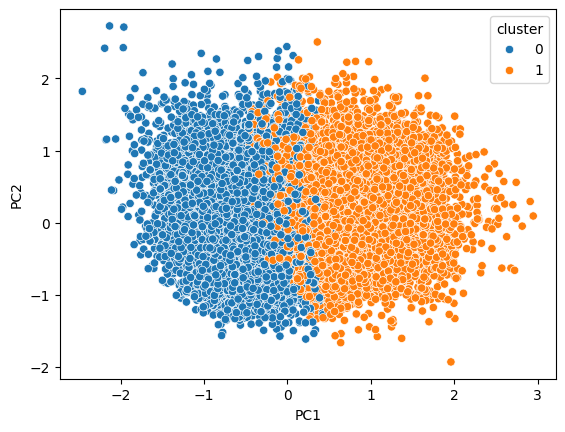

In [18]:
r=sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

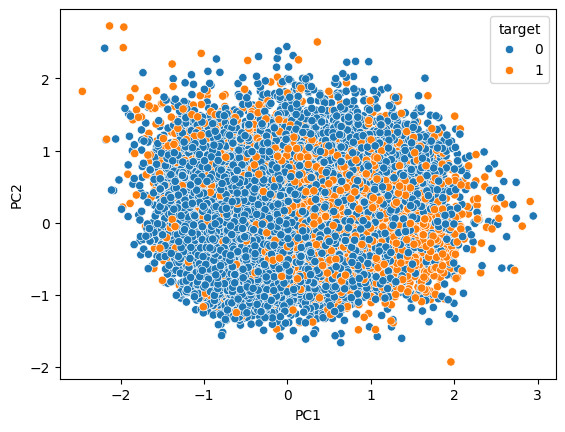

In [19]:
r=sns.scatterplot(x="PC1",y="PC2",hue="target",data=pca_data)

In [20]:
data = data.merge(cluster_kmeans_index,on=['index'])

In [21]:
data.to_csv('data/data4analytics.csv',index=False)

In [22]:
data.shape

(48842, 16)

In [23]:
data.loc[data.target==1,'target'].sum()/data.shape[0]

0.23928176569346055

In [24]:
#TSNE : Compressing the weights to 3 dimensions to plot the data
tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=500, random_state=42)
new_values = tsne_model.fit_transform(project_dataset.iloc[:,1:])

In [25]:
new_values = pd.DataFrame(new_values)

In [26]:
new_values['cluster'] = pd.Categorical(cluster_kmeans_index.cluster)

In [27]:
new_values.columns=['x','y','z','cluster']

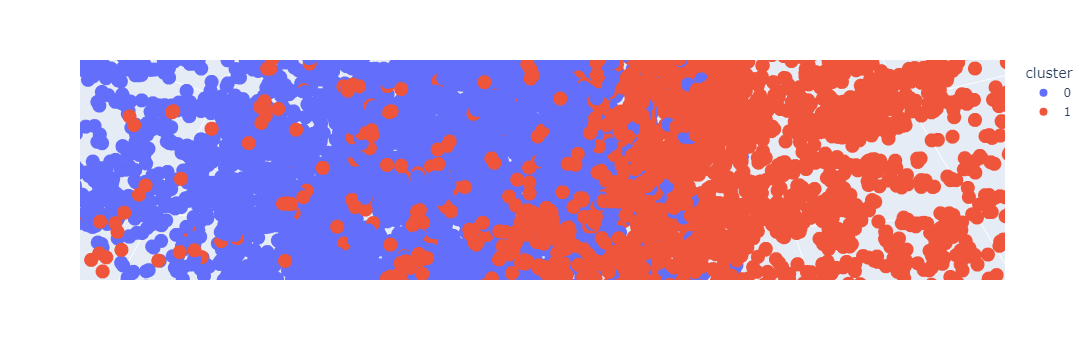

In [29]:
fig = px.scatter_3d(new_values , x='x', y='y', z='z', color='cluster')
fig.show()